In [1]:
import numpy as np
import pandas as pd

In [3]:
pd.__version__, np.__version__

(u'0.17.1', '1.10.1')

In [4]:
Boston = pd.read_csv('../data_sets/Boston.csv')
print Boston.shape
print Boston.columns
Boston.head()

(506, 14)
Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'black', u'lstat', u'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.__version__

'1.5.0'

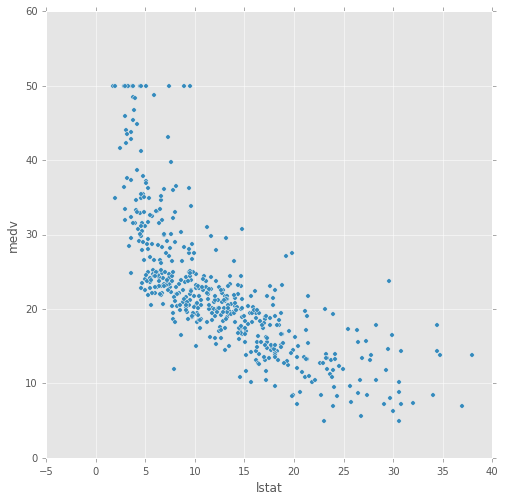

In [9]:
Boston.plot(kind='scatter', x='lstat', y='medv', figsize=(8,8))

## line fit with numpy
Source: http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html

In [65]:
z = np.polyfit(Boston.lstat, Boston.medv, 1)
print 'slope / intercept', z

p = np.poly1d(z)
print p

xp = np.linspace(-5, 40, 100)
print xp

slope / intercept [ -0.95004935  34.55384088]
 
-0.95 x + 34.55
[ -5.          -4.54545455  -4.09090909  -3.63636364  -3.18181818
  -2.72727273  -2.27272727  -1.81818182  -1.36363636  -0.90909091
  -0.45454545   0.           0.45454545   0.90909091   1.36363636
   1.81818182   2.27272727   2.72727273   3.18181818   3.63636364
   4.09090909   4.54545455   5.           5.45454545   5.90909091
   6.36363636   6.81818182   7.27272727   7.72727273   8.18181818
   8.63636364   9.09090909   9.54545455  10.          10.45454545
  10.90909091  11.36363636  11.81818182  12.27272727  12.72727273
  13.18181818  13.63636364  14.09090909  14.54545455  15.          15.45454545
  15.90909091  16.36363636  16.81818182  17.27272727  17.72727273
  18.18181818  18.63636364  19.09090909  19.54545455  20.          20.45454545
  20.90909091  21.36363636  21.81818182  22.27272727  22.72727273
  23.18181818  23.63636364  24.09090909  24.54545455  25.          25.45454545
  25.90909091  26.36363636  26.81818182

In [102]:
print np.polyfit(Boston.lstat, Boston.medv, 1, full=True)[0]
print np.polyfit(Boston.lstat, Boston.medv, 1, full=True)[1]
print np.polyfit(Boston.lstat, Boston.medv, 1, full=True)[2]
print np.polyfit(Boston.lstat, Boston.medv, 1, full=True)[3]
print np.polyfit(Boston.lstat, Boston.medv, 1, full=True)[4]

[ -0.95004935  34.55384088]
[ 19472.38141833]
2
[ 1.36787617  0.35904707]
1.12354570092e-13


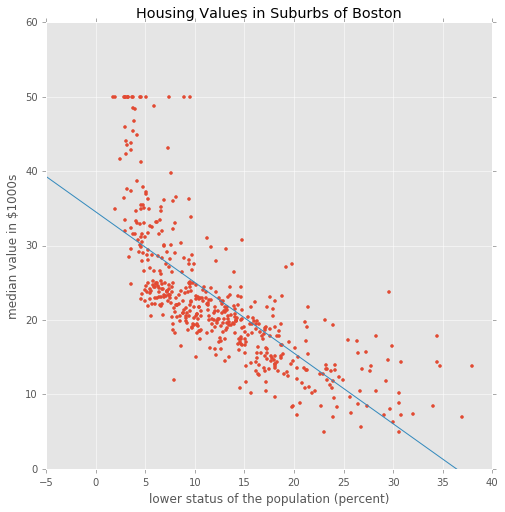

In [49]:
fig = plt.figure(figsize=(8,8))
plt.plot(Boston.lstat, Boston.medv, '.', xp, p(xp), '-')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

In [114]:
# predict medv for list of lstat values
lstat_vals = [5, 10, 15]
medv_pred = [p(x) for x in lstat_vals]
medv_pred

[29.803594110593117, 25.053347341803171, 20.303100573013225]

## OLS with statsmodels
Source: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

In [68]:
import statsmodels.api as sm

In [75]:
X = Boston.lstat
X = sm.add_constant(X)

In [76]:
model = sm.OLS(Boston.medv, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 03 Feb 2016   Prob (F-statistic):           5.08e-88
Time:                        15:30:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [121]:
print 'Confidence Interval\n', results.conf_int()
print '\nResiduals Summary\n', results.resid.describe()
print '\nResiduals (Squared) Sum\n', np.sum(np.square(results.resid))

Confidence Interval
               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951

Residuals Summary
count    5.060000e+02
mean     6.989578e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

Residuals (Squared) Sum
19472.3814183


In [124]:
# OLS parameters
# intercept & slope
b, m = results.params
print b, m

34.5538408794 -0.950049353758


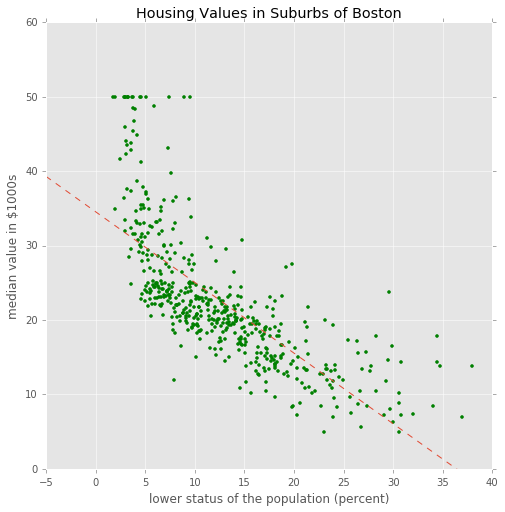

In [126]:
fig = plt.figure(figsize=(8,8))
plt.plot(Boston.lstat, Boston.medv, 'g.', xp, m*xp + b, '--')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

In [54]:
A = np.vstack([Boston.lstat, Boston.age]).T
A

array([[  4.98,  65.2 ],
       [  9.14,  78.9 ],
       [  4.03,  61.1 ],
       ..., 
       [  5.64,  91.  ],
       [  6.48,  89.3 ],
       [  7.88,  80.8 ]])

In [59]:
m, c = np.linalg.lstsq(A, Boston.medv)[0]
print m, c

-0.71798877822 0.392757004285


In [104]:
np.linalg.lstsq(X, Boston.medv)

(array([ 34.55384088,  -0.95004935]),
 array([ 19472.38141833]),
 2,
 array([ 327.33368848,   11.02790503]))